In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [2]:
# Load dataset (Assuming 'daily-min-temperature.csv')
df = pd.read_csv("daily-min-temperatures.xls",parse_dates = ['Date'],index_col = 'Date')

In [3]:
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [4]:
# Extract Temp value

data = df['Temp'].values

In [5]:
# Split data into training and testing sets

train_size = int(len(data)*0.8)
train,test = data[:train_size],data[train_size:]

In [9]:
# Walk forwrard Validation

history = train.tolist()
predictions = []

for t in test:
    # Fit AR Model
    model = AutoReg(history,lags = 7) # using last 7 days for autoregression
    model_fit = model.fit()
    
    # predict next value
    y_pred = model_fit.predict(start = len(history),end = len(history))[0]
    predictions.append(y_pred)
    
    # Update history with actual observation
    history.append(t)

In [ ]:
# Steps for Walk Validation Forward

# 1.

In [13]:
# Evaluate performance
rmse = np.sqrt(mean_squared_error(test,predictions))
print("Walk Forward Validation RMSE",rmse)

Walk Forward Validation RMSE 2.2410979907312942


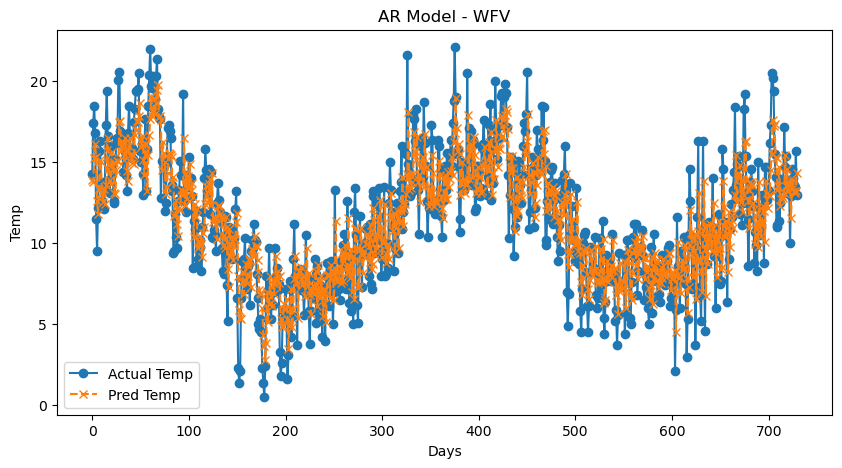

In [14]:
# plot actual Vs Predicted Values

plt.figure(figsize = (10,5))
plt.plot(test,label="Actual Temp",marker = 'o')
plt.plot(predictions,label = 'Pred Temp',marker = 'x',linestyle = 'dashed')
plt.xlabel('Days')
plt.ylabel('Temp')
plt.title("AR Model - WFV")
plt.legend()
plt.show()